In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
!git clone
!pip install git+https://github.com/lemeln/nam.git

fatal: You must specify a repository to clone.

usage: git clone [<options>] [--] <repo> [<dir>]

    -v, --verbose         be more verbose
    -q, --quiet           be more quiet
    --progress            force progress reporting
    --reject-shallow      don't clone shallow repository
    -n, --no-checkout     don't create a checkout
    --bare                create a bare repository
    --mirror              create a mirror repository (implies bare)
    -l, --local           to clone from a local repository
    --no-hardlinks        don't use local hardlinks, always copy
    -s, --shared          setup as shared repository
    --recurse-submodules[=<pathspec>]
                          initialize submodules in the clone
    --recursive ...       alias of --recurse-submodules
    -j, --jobs <n>        number of submodules cloned in parallel
    --template <template-directory>
                          directory from which templates will be used
    --reference <repo>    reference rep

load dataset

In [3]:

# Step 2: Load the dataset
df = pd.read_csv('diabetes.csv')  # Replace 'diabetes_dataset.csv' with your actual file path


demonstrate data correlation factors

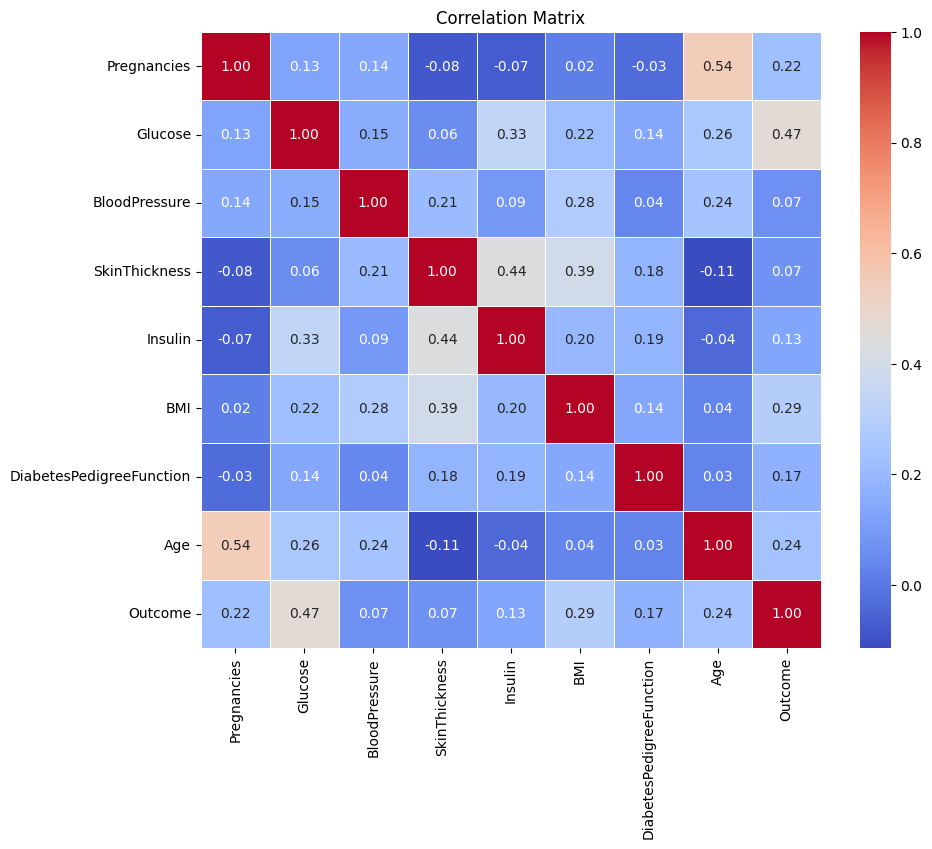

In [ ]:
# Step 4: Compute the correlation matrix
corr_matrix = df.corr()

# Step 5: Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


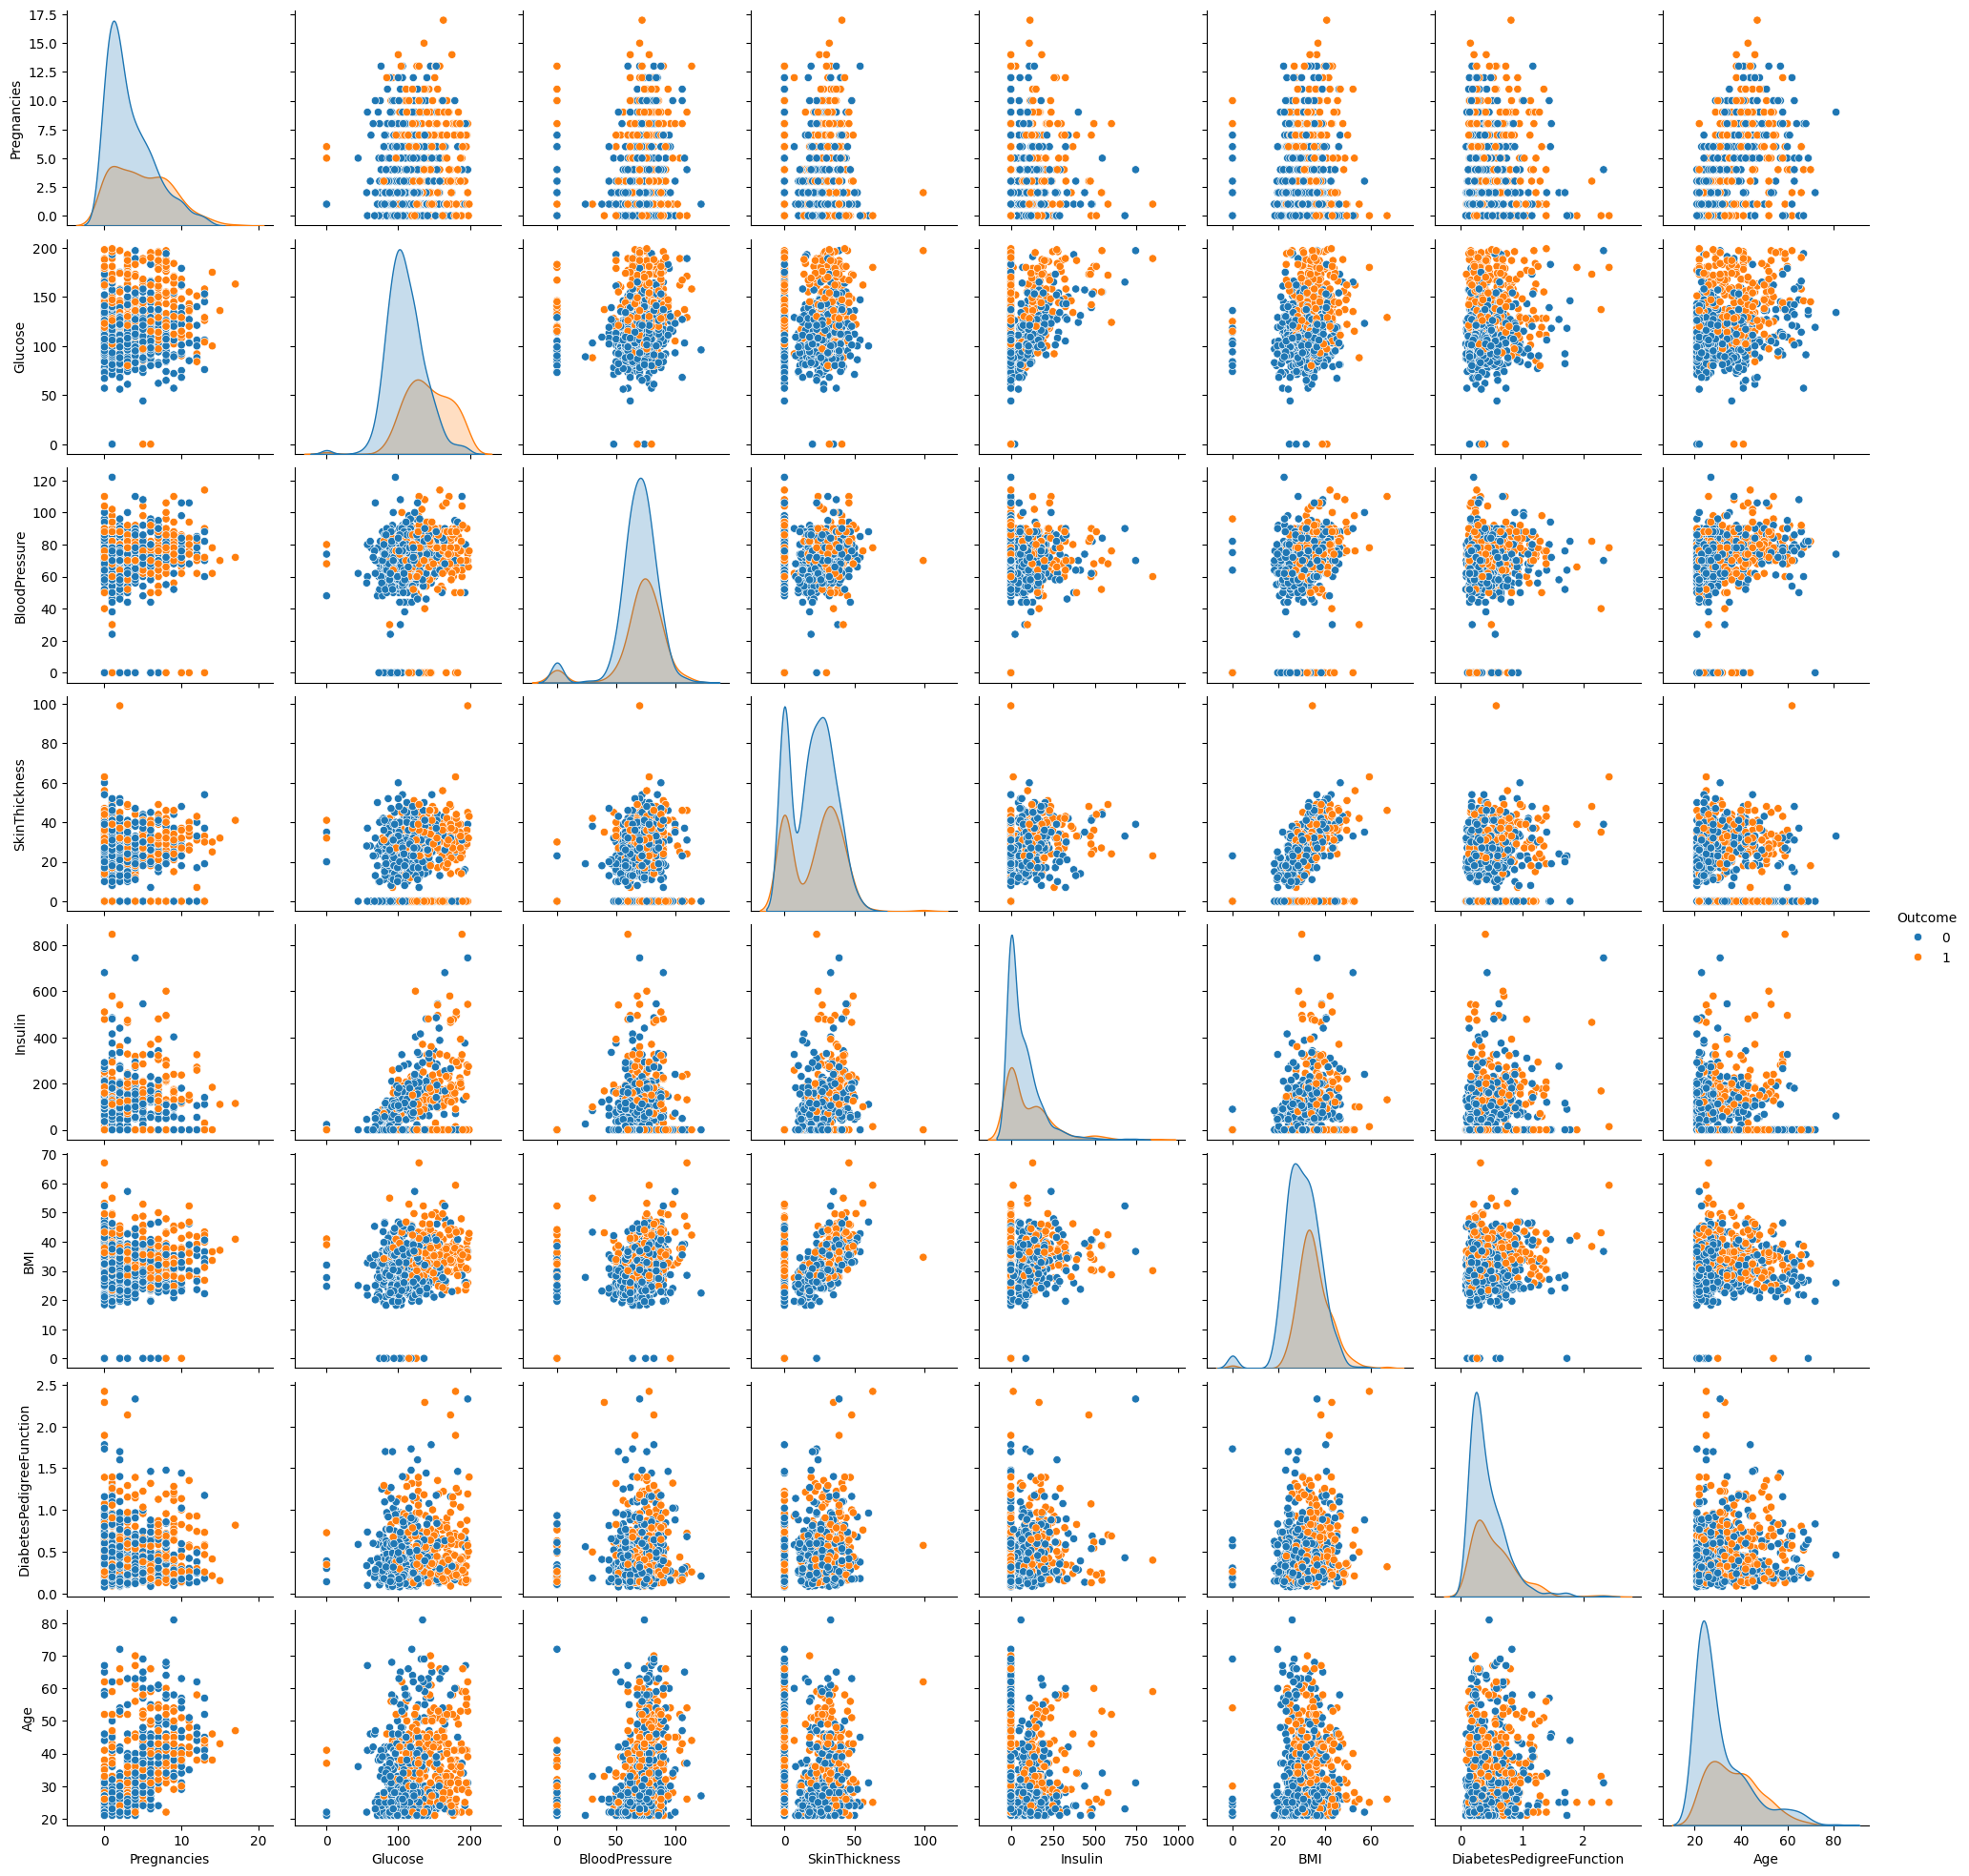

In [4]:
sns.pairplot(df, diag_kind='kde',hue='Outcome')
plt.show()

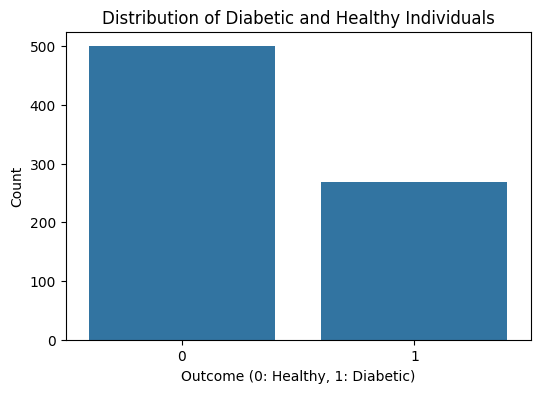

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Outcome')
plt.title('Distribution of Diabetic and Healthy Individuals')
plt.xlabel('Outcome (0: Healthy, 1: Diabetic)')
plt.ylabel('Count')
plt.show()

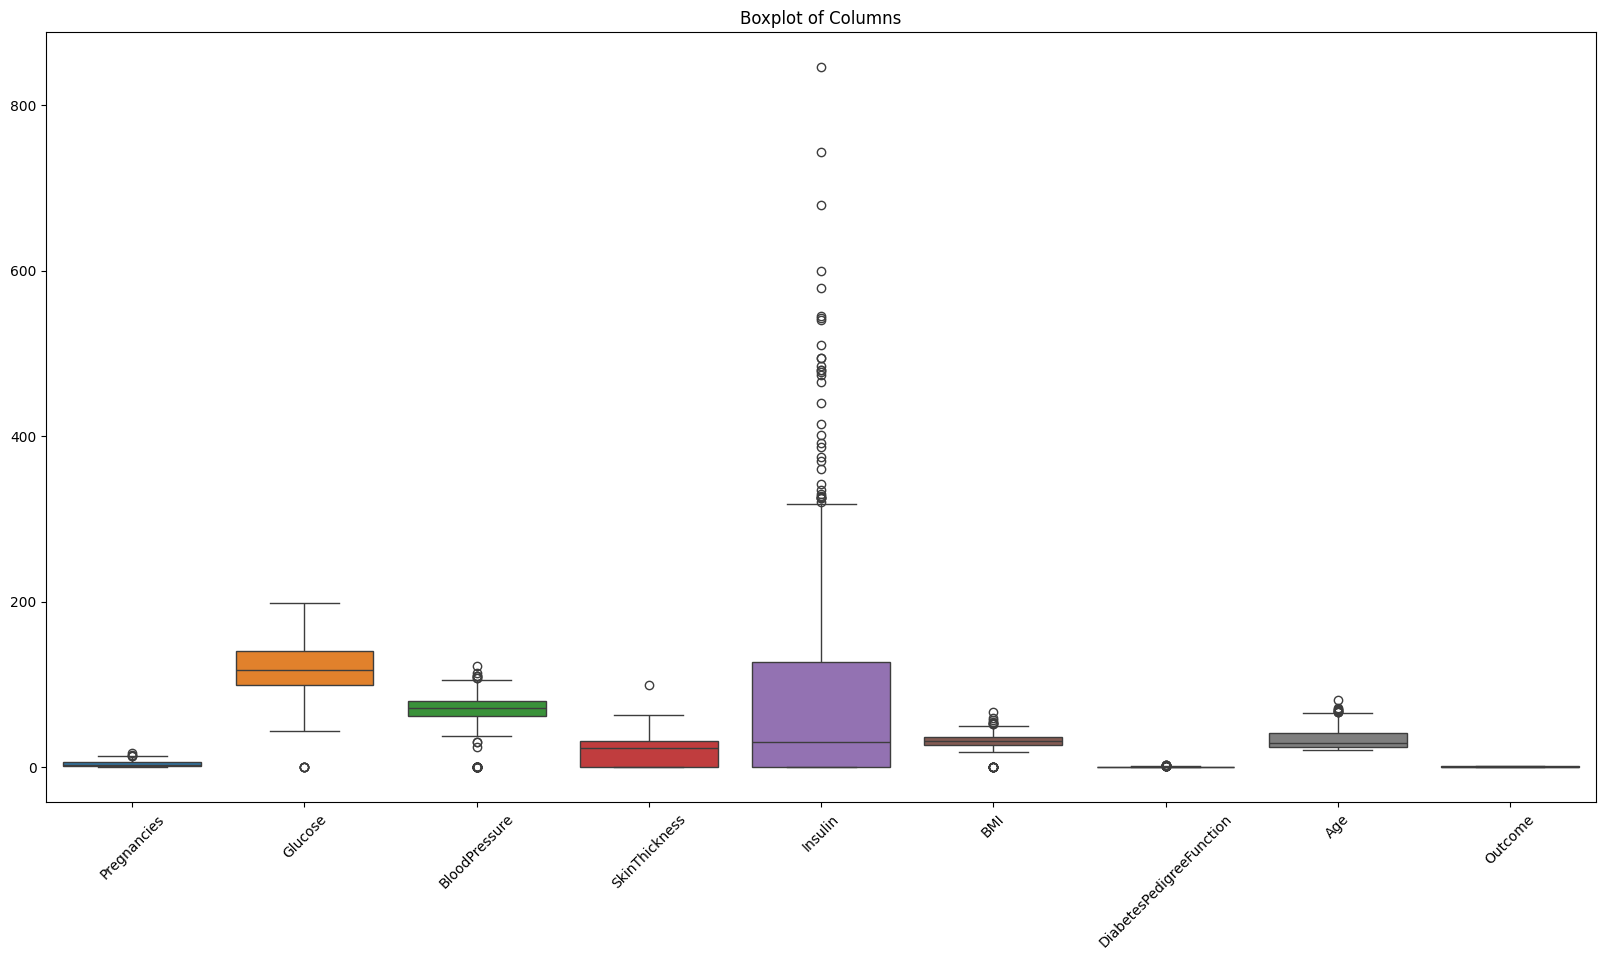

<Figure size 1200x600 with 0 Axes>

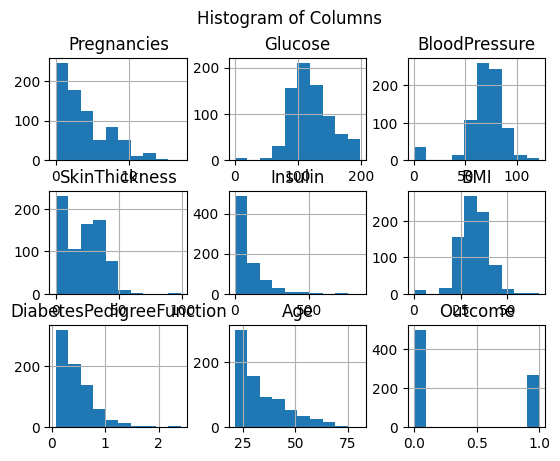

In [ ]:

# Step 3: Check for outliers
plt.figure(figsize=(20, 10))
sns.boxplot(data=df)
plt.title('Boxplot of Columns')
plt.xticks(rotation=45)
plt.show()

# Step 4: Check distribution of data
plt.figure(figsize=(12, 6))
df.hist()
plt.suptitle('Histogram of Columns')
plt.show()


remove outliers

In [ ]:

# Calculate the first and third quartile
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers and return the DataFrame without outliers
df = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]



Normalize data

In [ ]:

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the data and transform it
df= pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

data preprocessing

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 3: Separate features and target variable
X = df.drop(columns=['Outcome'])  # Features
y = df['Outcome']  # Target variable

# Step 4: Preprocessing - Normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Step 6: Perform any other preprocessing steps here (if needed)

# Step 7: Validation - Split the data into train, validation, and test sets
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.33, random_state=42)
# Now, X_train contains 70% of the data, X_val contains 10% of the data, and X_test contains 20% of the data


train and test the neural network model

Epoch 1/100, Train Loss: 0.2435, Val Loss: 0.2075
Epoch 2/100, Train Loss: 0.1721, Val Loss: 0.1577
Epoch 3/100, Train Loss: 0.1515, Val Loss: 0.1657
Epoch 4/100, Train Loss: 0.1415, Val Loss: 0.1639
Epoch 5/100, Train Loss: 0.1336, Val Loss: 0.1616
Epoch 6/100, Train Loss: 0.1348, Val Loss: 0.1643
Epoch 7/100, Train Loss: 0.1301, Val Loss: 0.1671
Epoch 8/100, Train Loss: 0.1250, Val Loss: 0.1687
Epoch 9/100, Train Loss: 0.1221, Val Loss: 0.1705
Epoch 10/100, Train Loss: 0.1183, Val Loss: 0.1652
Epoch 11/100, Train Loss: 0.1085, Val Loss: 0.1662
Epoch 12/100, Train Loss: 0.1065, Val Loss: 0.1711
Epoch 13/100, Train Loss: 0.1000, Val Loss: 0.1677
Epoch 14/100, Train Loss: 0.0991, Val Loss: 0.1647
Epoch 15/100, Train Loss: 0.0900, Val Loss: 0.1633
Epoch 16/100, Train Loss: 0.0922, Val Loss: 0.1577
Epoch 17/100, Train Loss: 0.0843, Val Loss: 0.1596
Epoch 18/100, Train Loss: 0.0784, Val Loss: 0.1594
Epoch 19/100, Train Loss: 0.0708, Val Loss: 0.1665
Epoch 20/100, Train Loss: 0.0622, Val Lo

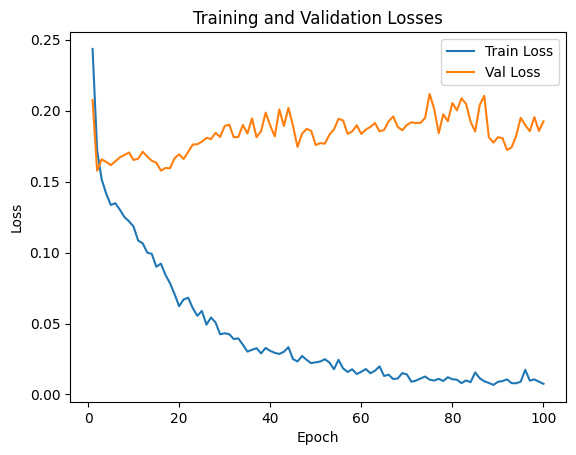

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(8, 100)
        self.bn1 = nn.BatchNorm1d(100)
        self.fc2 = nn.Linear(100, 50)
        self.dropout = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(50, 50)
        self.fc4 = nn.Linear(50, 20)
        self.fc5 = nn.Linear(20, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.bn1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = torch.relu(self.fc5(x))
        return x

# Instantiate the model
model = Model()

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Function for training the model
def train_model(model, criterion, optimizer, X_train, y_train, X_val, y_val, epochs=100, batch_size=32):
    train_losses = []
    val_losses = []

    X_train = np.array(X_train)
    y_train = np.array(y_train)
    X_val = np.array(X_val)
    y_val = np.array(y_val)

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for i in range(0, len(X_train), batch_size):
            inputs = torch.tensor(X_train[i:i+batch_size], dtype=torch.float32)
            labels = torch.tensor(y_train[i:i+batch_size], dtype=torch.float32).view(-1, 1)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
        train_loss = running_loss / len(X_train)
        train_losses.append(train_loss)

        model.eval()
        with torch.no_grad():
            val_inputs = torch.tensor(X_val, dtype=torch.float32)
            val_labels = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)
            val_outputs = model(val_inputs)
            val_loss = criterion(val_outputs, val_labels)
            val_losses.append(val_loss.item())

        print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss.item():.4f}')
    return train_losses, val_losses


def test_model(model, X_test, y_test):
    model.eval()
    with torch.no_grad():
        X_test = np.array(X_test)
        y_test = np.array(y_test)

        test_inputs = torch.tensor(X_test, dtype=torch.float32)
        test_labels = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

        test_outputs = model(test_inputs)
        test_loss = criterion(test_outputs, test_labels)
        print(f'Test Loss: {test_loss.item():.4f}')

# Train the model
train_losses, val_losses = train_model(model, criterion, optimizer, X_train, y_train, X_val, y_val)

# Test the model
test_model(model, X_test, y_test)

# Plot the training and validation losses
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()


Accuracy: 0.75
Precision: 0.6060606060606061
Recall: 0.5128205128205128
F1 Score: 0.5555555555555556


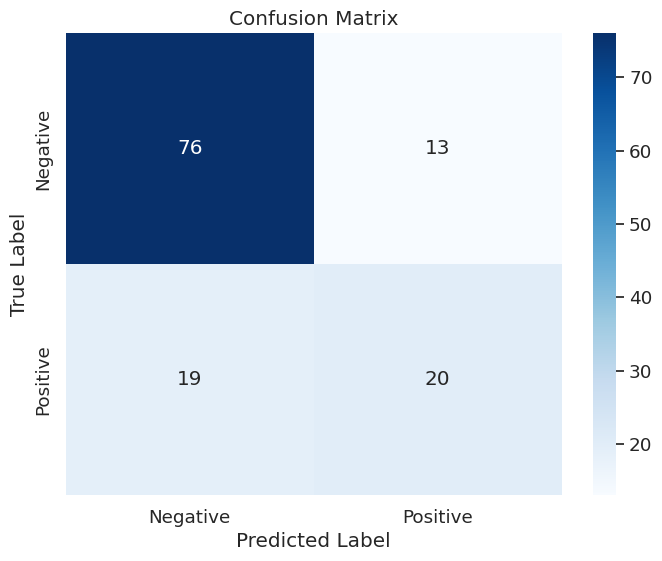

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

# Function to calculate evaluation metrics
def evaluate_model(model, X, y_true):
    model.eval()
    with torch.no_grad():
        X = np.array(X)
        y_true = np.array(y_true)

        inputs = torch.tensor(X, dtype=torch.float32)
        labels = torch.tensor(y_true, dtype=torch.float32).view(-1, 1)
        outputs = model(inputs)
        predicted = torch.round(outputs).numpy().flatten()  # Round predictions to 0 or 1

        accuracy = accuracy_score(y_true, predicted)
        precision = precision_score(y_true, predicted)
        recall = recall_score(y_true, predicted)
        f1 = f1_score(y_true, predicted)
        cm = confusion_matrix(y_true, predicted)

        return accuracy, precision, recall, f1, cm


# Evaluate the model
accuracy, precision, recall, f1, cm = evaluate_model(model, X_test, y_test)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
# Plot confusion matrix
classes = ['Negative', 'Positive']  # Define class labels if not already defined
plot_confusion_matrix(cm, classes)


LIME

In [9]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=5428aca6b59724ebc530367766658f3e277207520b96d567afc31937007d879f
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [14]:
from lime.lime_tabular import LimeTabularExplainer
import random
import pandas as pd

# Convert X_test to a pandas DataFrame
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Create LimeTabularExplainer
explainer = LimeTabularExplainer(X_train, mode="regression", feature_names=X.columns.tolist(), discretize_continuous=False)

# Select three random samples from the test data
random_samples = []
random_samples_index=[]
for _ in range(3):
    sample_idx = random.randint(0, len(X_test_df) - 1)
    sample = X_test_df.iloc[sample_idx]
    true_label = y_test.iloc[sample_idx]
    random_samples.append((sample, true_label))
    random_samples_index.append(sample_idx)


def model_predict(X):
    inputs = torch.tensor(X, dtype=torch.float32)
    outputs = model(inputs)
    return outputs.detach().numpy()


# Function to explain a given sample
def explain_sample(sample):
    sample_data, true_label = sample

    # Explain the model's prediction for the selected sample
    explanation = explainer.explain_instance(sample_data, model_predict, num_features=len(X.columns))

    # Print the true label and the model's prediction for the sample
    print("True Label:", true_label)
    print("Model's Prediction:", model_predict(sample_data.values.reshape(1, -1))[0])

    # Print the explanation
    explanation.show_in_notebook(show_table=True)

# Explain each of the selected samples
for i, sample in enumerate(random_samples):
    print(f"Explaining Sample {i + 1}:")
    explain_sample(sample)


Explaining Sample 1:
True Label: 0.0
Model's Prediction: [1.0020704]


Explaining Sample 2:
True Label: 1.0
Model's Prediction: [0.]


Explaining Sample 3:
True Label: 0.0
Model's Prediction: [0.1349764]


In [31]:
# Initialize a dictionary to accumulate the total importance of each feature
feature_importances = []
explainer = LimeTabularExplainer(X_train, mode="regression", feature_names=X.columns.tolist(), discretize_continuous=False)
# Loop over all samples in the test set
for index, sample in X_test_df.iterrows():
    explanation = explainer.explain_instance(sample, model_predict, num_features=len(X.columns))
    feature_importances.append(explanation.as_list())



In [37]:
# Initialize dictionaries to store the sum of values for each attribute
sums = {'Glucose': 0, 'Insulin': 0, 'BMI': 0, 'DiabetesPedigreeFunction': 0, 'Age': 0, 'BloodPressure': 0, 'SkinThickness': 0, 'Pregnancies': 0}
counts = {'Glucose': 0, 'Insulin': 0, 'BMI': 0, 'DiabetesPedigreeFunction': 0, 'Age': 0, 'BloodPressure': 0, 'SkinThickness': 0, 'Pregnancies': 0}


for array in feature_importances:
    # Iterate through each tuple in the array
    for attribute, value in array:
        # Accumulate the sum for each attribute
        sums[attribute] += value
        # Increment the count for each attribute
        counts[attribute] += 1

# Calculate the average for each attribute
averages = {attribute: sums[attribute] / counts[attribute] for attribute in sums}

# Print the average values
for attribute, avg_value in averages.items():
    print(f"{attribute}: {avg_value}")


Glucose: 0.16713629091214963
Insulin: -0.06357228251902106
BMI: 0.0671514992962743
DiabetesPedigreeFunction: 0.07769910040610054
Age: 0.0506452721122577
BloodPressure: 0.03163816402933623
SkinThickness: 0.03944630320266759
Pregnancies: 0.013210778792132715


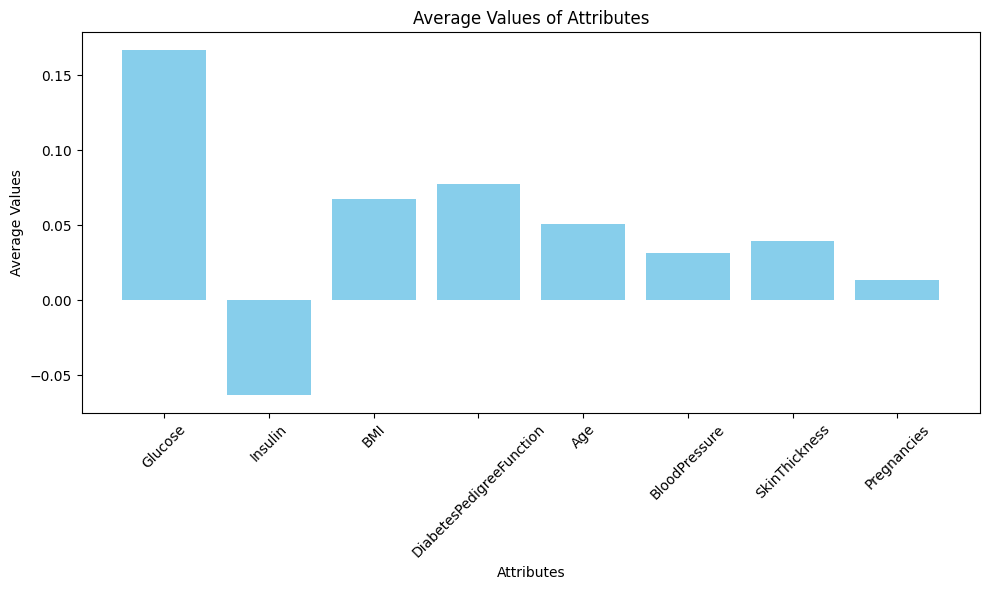

In [38]:
# Extract attribute names and average values
attributes = list(averages.keys())
average_values = list(averages.values())

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(attributes, average_values, color='skyblue')

# Add labels and title
plt.xlabel('Attributes')
plt.ylabel('Average Values')
plt.title('Average Values of Attributes')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Display the plot
plt.tight_layout()
plt.show()

SHAP

In [15]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 3.5 MB/s eta 0:00:00


In [16]:
features = df.columns.drop('Outcome')

In [21]:
import shap

# Initialize SHAP explainer with your trained model
explainer = shap.KernelExplainer(model_predict, X_train)
shap_values = explainer.shap_values(X_test)
shap.initjs()



def explain_sample_shap(inx):

    shap_value = shap_values[inx]

    # Flatten the shap_value if it's 2D and we're only dealing with a single instance
    if shap_value.ndim == 2 and shap_value.shape[1] == 1:
        shap_value = shap_value.flatten()  # Convert from (8, 1) to (8,)

    sample =X_test[inx]
    if sample.ndim == 1:
        sample = sample.reshape(1, -1)  # Ensure 2D array for features


    shap_plot = shap.force_plot(
        explainer.expected_value,
        shap_value,
        features=sample,
        feature_names=features
    )

    shap.save_html(f"shap_force_plot_{inx}.html", shap_plot)


# Explain each of the selected samples
for i in (random_samples_index):
    print(f"Explaining Sample {i + 1} has saves")
    explain_sample_shap(i)

  0%|          | 0/128 [00:00<?, ?it/s]

Explaining Sample 38 has saves
Explaining Sample 40 has saves
Explaining Sample 85 has saves


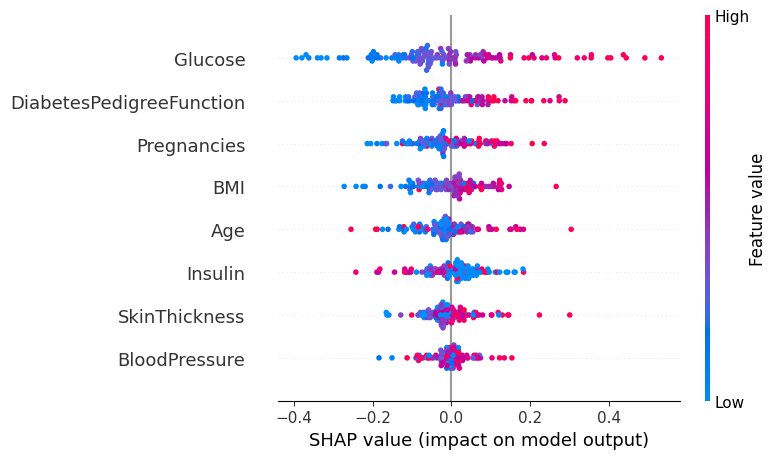

In [22]:
shap_values = shap_values.squeeze()
shap.summary_plot(shap_values, X_test, feature_names=features.tolist())

NAM

In [ ]:
from nam.wrapper import NAMClassifier, MultiTaskNAMClassifier
import sklearn.metrics as sk_metrics

# Create and train the NAMClassifier
NAM_model = NAMClassifier(
            num_epochs=10,
            num_learners=20,
            metric='auroc',
            early_stop_mode='max',
            monitor_loss=False,
            n_jobs=10,
            random_state=10
        )

NAM_model.fit(X_train, y_train)

# Use the predict_proba method of the NAMClassifier
pred_proba = NAM_model.predict_proba(X_test)

# Calculate ROC AUC score
roc_auc = sk_metrics.roc_auc_score(y_test, pred_proba)
print(roc_auc)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


0.8758282915586286
